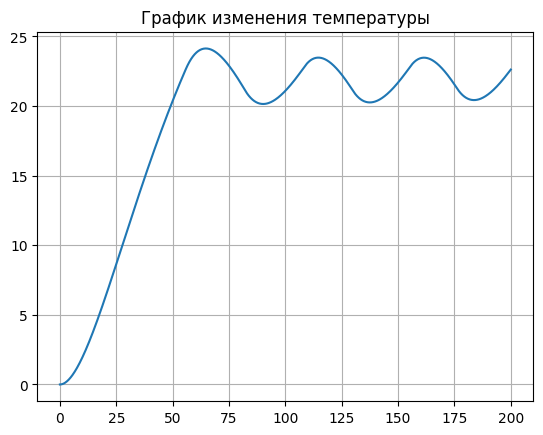

In [32]:
from scipy.integrate import odeint 
import numpy as np 
import matplotlib.pyplot as plt 
 
T_1 = 20 
T_2 = 40 
k = 40/220 
state = 0 
def ode_sys_1_control(x): 
    try: 
        ode_sys_1_control.state 
    except: 
        ode_sys_1_control.state = 0 
    c_1 = x >= 21 
    c_2 = x >= 23 
     
    if not c_1 and not c_2: 
        ode_sys_1_control.state = 1 
        return 1 
    elif c_1 and c_2: 
        ode_sys_1_control.state = 0 
        return 0 
    elif c_1 and not c_2 and ode_sys_1_control.state==1: 
        ode_sys_1_control.state = 1 
        return 1 
    elif c_1 and not c_2 and ode_sys_1_control.state==0: 
        ode_sys_1_control.state = 0 
        return 0 
 
def ode_sys_1(x, t): 
    v, theta = x 
     
    u = 220 * ode_sys_1_control(theta) 
    dv_dt = (u - v)/T_1 
    dtheta_dt = (k*v - theta) / T_2 
    return (dv_dt, dtheta_dt) 
 
 
y0 = (0, 0) 
t = np.linspace(0, 200, 1001) 
sol_ode_sys_1 = odeint(ode_sys_1, y0, t) 
 
plt.plot(t, sol_ode_sys_1[:,1]) 
plt.title('График изменения температуры')
plt.grid() 

In [33]:
data = sol_ode_sys_1[:,1]
data = data[400:] - data[400:].mean()

Text(0, 0.5, 'Temperatur, C')

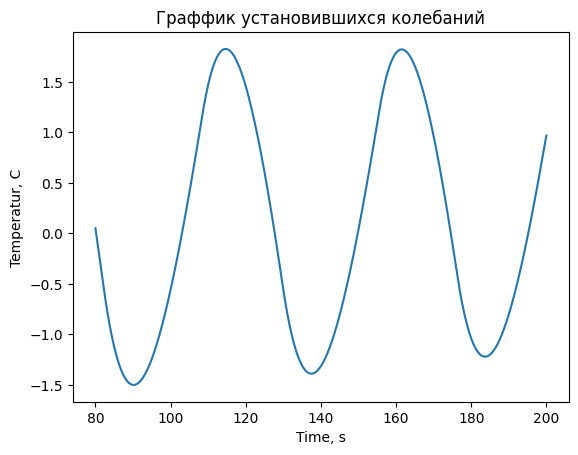

In [34]:
plt.plot(t[400:], data)
plt.title('Граффик установившихся колебаний')
plt.xlabel('Time, s')
plt.ylabel('Temperatur, C')

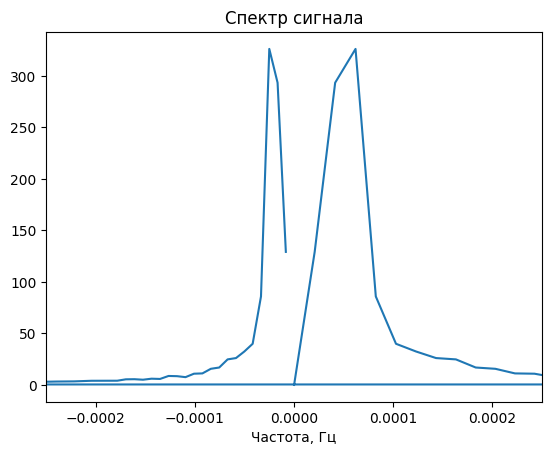

In [40]:
plt.title('Спектр сигнала')
spec = np.abs(np.fft.fft(data)) 
freqs = np.fft.fftfreq(data.shape[0], t[400:])
plt.xlabel('Частота, Гц') 
plt.xlim(-0.00025, 0.00025)
plt.plot(freqs, spec)

In [39]:
freqs[spec.argmax()]

6.193152025367151e-05

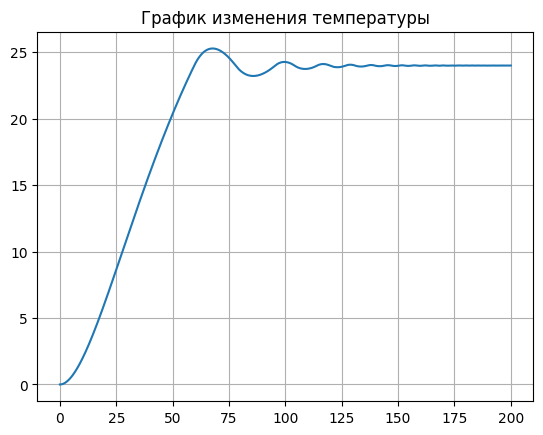

In [43]:
def ode_sys_2_control(x):
    if x < 24 :
        return True
    return False

def ode_sys_2(x, t): 
    v, theta = x 
     
    u = 220 * ode_sys_2_control(theta) 
    dv_dt = (u - v)/T_1 
    dtheta_dt = (k*v - theta) / T_2 
    return (dv_dt, dtheta_dt) 

y0 = (0, 0) 
t = np.linspace(0, 200, 1001) 
sol_ode_sys_1 = odeint(ode_sys_2, y0, t) 
 
plt.plot(t, sol_ode_sys_1[:,1]) 
plt.title('График изменения температуры')
plt.grid() 